In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer #Categorical Variable handle.
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import FunctionTransformer # Log 

# FunctionTranformers 
## log (Apply:-Right skew data)
## sqare root (x^2)
## Reciprocal (1/x)
## Custom:-we can also create own custom function.

In [2]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [6]:
X = df.iloc[:,1:]

In [7]:
y=df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

In [9]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [10]:
# Positive Value indicated to Right skew 
# In right skew value we use log transformer.
df.skew()

Survived    0.478523
Age         0.434488
Fare        4.787317
dtype: float64

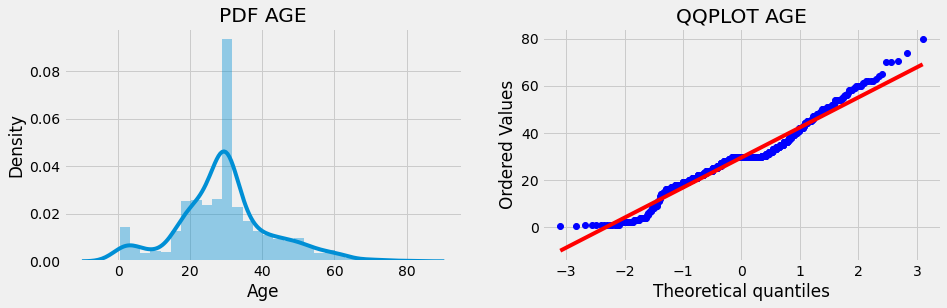

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("PDF AGE")

plt.subplot(122)
stats.probplot(X_train["Age"],dist='norm',plot=plt)
plt.title("QQPLOT AGE")

plt.show()

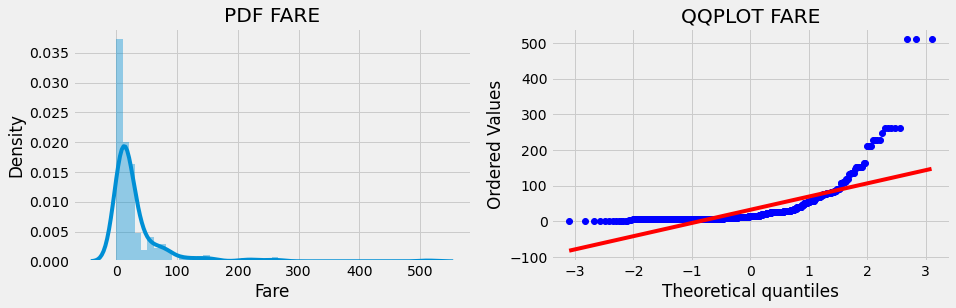

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("PDF FARE")

plt.subplot(122)
stats.probplot(X_train["Fare"],plot=plt,dist="norm")
plt.title("QQPLOT FARE")

plt.show()

# Trained model without doing  Function(log) transformer.

In [13]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

In [14]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [16]:
print("accuracy score in LR :",accuracy_score(y_test,y_pred1))
print("accuracy score in DC : ",accuracy_score(y_test,y_pred2))

accuracy score in LR : 0.6480446927374302
accuracy score in DC :  0.6480446927374302


# Trained model with Function(log) transformer

In [17]:
from sklearn.preprocessing import FunctionTransformer

In [18]:
ftnf = FunctionTransformer(func=np.log1p)

In [19]:
X_train_ftnf = ftnf.fit_transform(X_train)
X_test_ftnf = ftnf.transform(X_test)

In [20]:
model1_ft = LogisticRegression()
model2_ft = DecisionTreeClassifier()

In [21]:
model1_ft.fit(X_train_ftnf,y_train)
model2_ft.fit(X_train_ftnf,y_train)

DecisionTreeClassifier()

In [22]:
y_pred_ftnf1 = model1_ft.predict(X_test_ftnf)
y_pred_ftnf2 = model2_ft.predict(X_test_ftnf)

In [23]:
print("accuracy after tranformer LR:",accuracy_score(y_test,y_pred_ftnf1))
print("accuracy after tranformer DC:",accuracy_score(y_test,y_pred_ftnf2))

accuracy after tranformer LR: 0.6815642458100558
accuracy after tranformer DC: 0.7094972067039106


### After log transformer accuracy not change in DC but change in LR

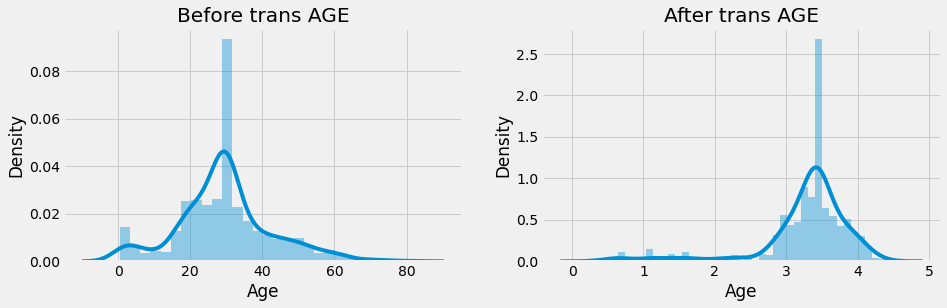

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
#stats.probplot(X_train["Age"],plot=plt)
plt.title("Before trans AGE")

plt.subplot(122)
sns.distplot(X_train_ftnf["Age"])
#stats.probplot(X_train_ftnf["Age"],dist='norm',plot=plt)
plt.title("After trans AGE")

plt.show()

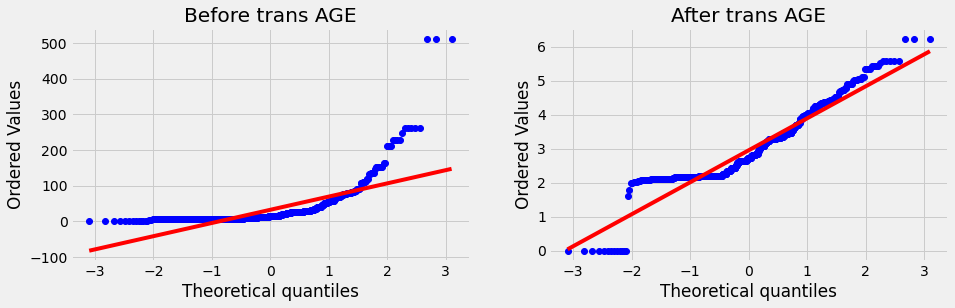

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Fare"],plot=plt)
plt.title("Before trans AGE")

plt.subplot(122)
stats.probplot(X_train_ftnf["Fare"],dist='norm',plot=plt)
plt.title("After trans AGE")

plt.show()

## After Looking this we conclude that applying log on Age column we don't find very much change so we apply log transform only Fare Column.

In [26]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


# Applying Transformers in One Column Fare

In [30]:
tnf1 = ColumnTransformer(transformers=[
    ("log",FunctionTransformer(func=np.log1p),["Fare"])
],remainder="passthrough")

In [31]:
X_train_transfromed = tnf1.fit_transform(X_train)
X_test_transformed = tnf1.transform(X_test)

In [32]:
m1=LogisticRegression()
m2=DecisionTreeClassifier()

m1.fit(X_train_transfromed,y_train)
m2.fit(X_train_transfromed,y_train)


DecisionTreeClassifier()

In [33]:
y_pred_m1 = m1.predict(X_test_transformed)
y_pred_m2 = m2.predict(X_test_transformed)

In [34]:
accuracy_score(y_test,y_pred_m1)

0.6703910614525139

In [35]:
accuracy_score(y_test,y_pred_m2)

0.6815642458100558